In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  #sometimes imported as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## Bar Chart
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

Plotting generation id column which is season when character was introduced

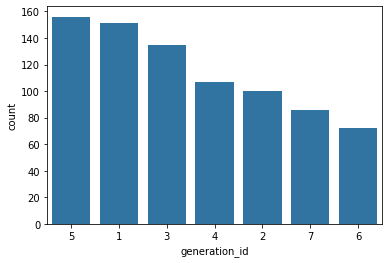

In [9]:
sb.countplot(data = pokemon, x = 'generation_id', color= base_color,
            order = gen_order ); # semi colon surpresses plot info, base color & order see below

Do not need different colours as brings no meaning.  best to plt in 1 colour to start.  Seaborn has a colour palette.  The below stored index 1 of the colour palette for use.

In [6]:
base_color= sb.color_palette()[0]

In [8]:
gen_order = pokemon['generation_id'].value_counts().index # counts each unique value in series then sorts DESC, need index values and store

In [10]:
type_order = pokemon['type_1'].value_counts().index

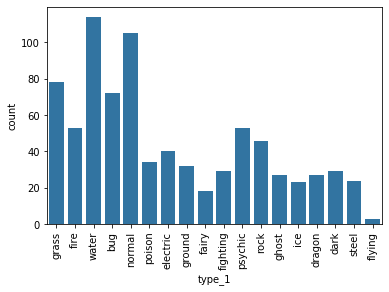

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'type_1', color = base_color); # if left here x axis labels unreadable
plt.xticks(rotation = 90); # labels rotate on x axis

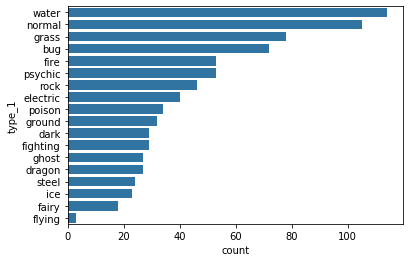

In [15]:
# or can plot on Y
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order); 


In [19]:
pkmn_types = pokemon.melt(id_vars = ['id','species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name= 'type_level', value_name = 'type').dropna()

pkmn_types[802:813]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [20]:
type_counts= pkmn_types['type'].value_counts()
type_order = type_counts.index

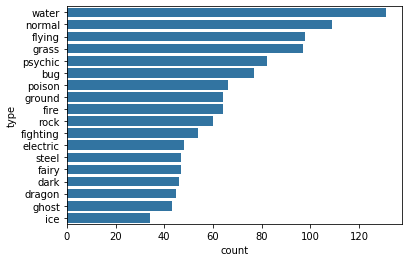

In [21]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

## Absolute vs. Relative Frequency
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.
Start by creating list of tick positions, need to compute length of longest bar in terms of proportion

In [22]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [25]:
# use numPy to create array of tick lists from 0 to max prop, in appropriate steps
tick_props = np.arange(0, max_prop, 0.02)
# using list comprehension to apply list of tick labels to apply to ticks
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

Text(0.5, 0, 'Proportion')

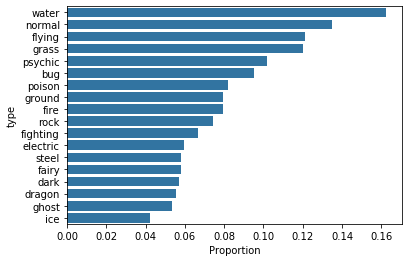

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names) # all ticks are abs need to * by number of pokemon to get position correct need to use both arguments here
plt.xlabel('Proportion') # update from default count to more appropriate label

### Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

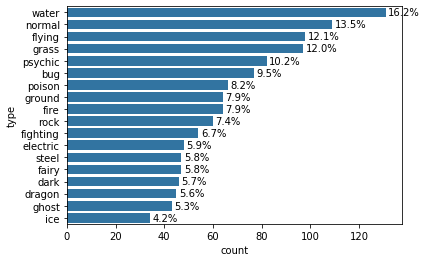

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center'); #va is vertical alignment of text

### Counting Missing Data
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

df.isna().sum()

What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
The first argument to the function contains the x-values (column names), the second argument the y-values (our counts).


As a general note, this is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the countplot function so that you don't need to do extra summarization work. In addition, you'll see what barplot's main purpose is in the next lesson, when we discuss adaptations of univariate plots for plotting bivariate data.

## Pie Charts
You can create a pie chart with matplotlib's pie function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

In [28]:
# sample pie chart code construction - do not run as data not in here
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

NameError: name 'df' is not defined

## Donut
sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a "wedgeprops" argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

In [ ]:
# sample donut code - do not run as data not here
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

## Histograms

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

 

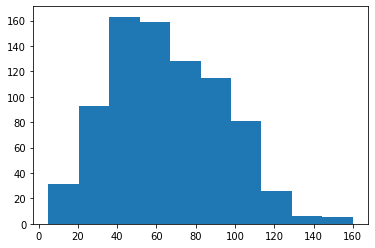

In [30]:
plt.hist(data = pokemon, x = 'speed');

By default will create with 10 bins, normally too few and the bin boundaries not always aligned with tick marks, making interpretation trickier.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

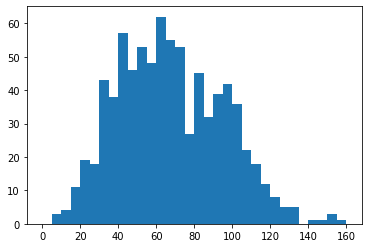

In [33]:
bins = np.arange(0, pokemon['speed'].max()+5, 5) # explicitly set bin boundaries by creating list (+5 to max as doesn't include top most argument)
plt.hist(data = pokemon, x = 'speed', bins = bins )

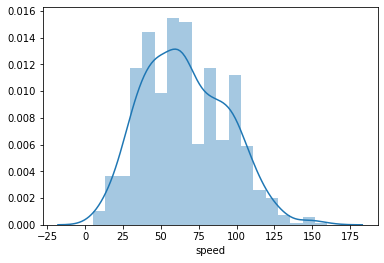

In [34]:
sb.distplot(pokemon['speed']);
# bin count default larger than hist, line plotted over is the density curve estimate of distribution, area under curve is set to be =1

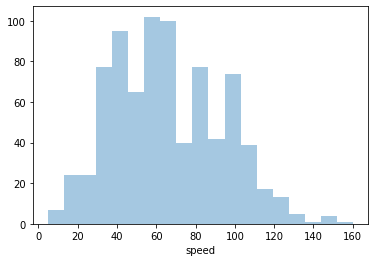

In [35]:
sb.distplot(pokemon['speed'], kde = False); # option turns of density function

## Subplot

plt.figure(figsize = [10, 5]) # larger figure size for subplots

### histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+10, 10)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

### histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The figure() function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. 

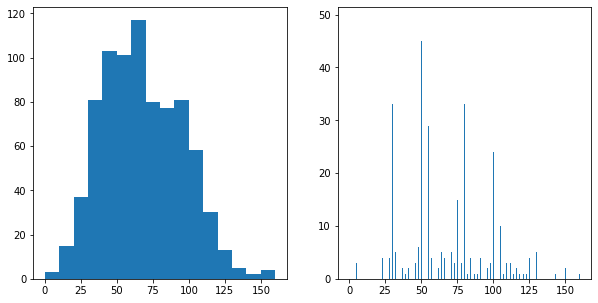

In [48]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+10, 10)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. 

If don't explicit state figure area, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

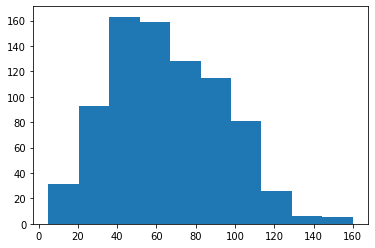

In [41]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed');

figure() creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

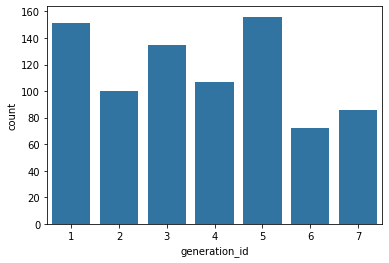

In [44]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with

Back to subplot() 
First of all, plt.figure(figsize = [10, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively. 

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). 

Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function:

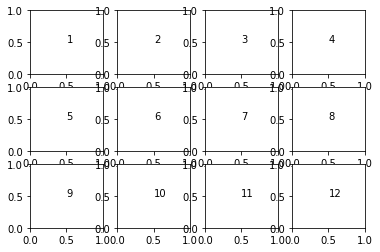

In [49]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

## Descriptive stats, outliers and Axis limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

### Axis limits
You might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. 
 
You can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

(0, 6)

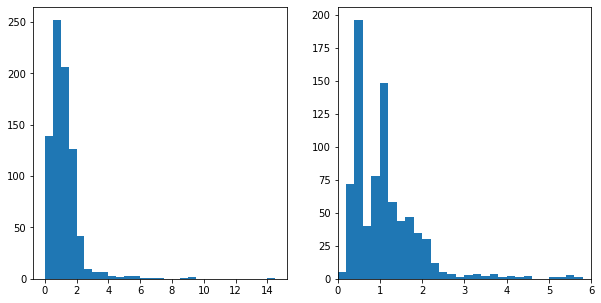

In [55]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges);

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 6, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bin_edges);
plt.xlim(0, 6) # could also be called as plt.xlim((0, 125))

### Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

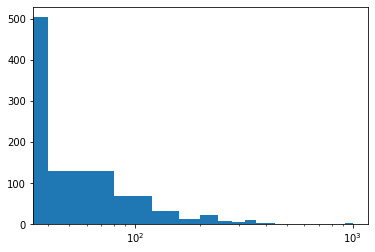

In [60]:
bins = np.arange(0, pokemon['weight'].max()+40,40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

end up with odd looking plot, need to modify bin boundariers and have more appropriate ticks

In [61]:
pokemon['weight'].describe()  #min 0.1 and max 999.9

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [62]:
np.log10(pokemon['weight'].describe())  # log (base10) negative one and just under 3

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

above give limits for bins

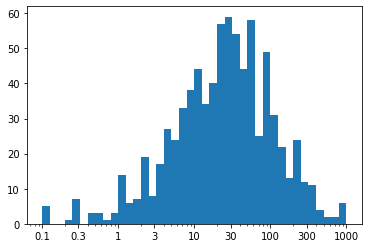

In [67]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]  # manually setting ticks into readable format. on log .3 is generally between
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);